In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

In [75]:
df=pd.read_csv('EastWestAirlines.csv')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


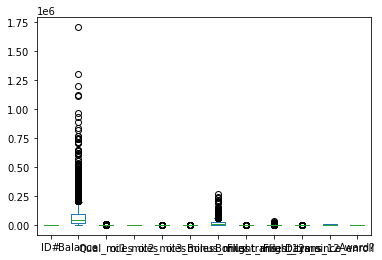

In [77]:
df.plot(kind="box")
plt.show()

In [78]:
df.duplicated().sum()

0

In [79]:
df=df.drop(columns=['ID#'],axis=1)

In [80]:
df_norm=StandardScaler().fit_transform(df)


In [81]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

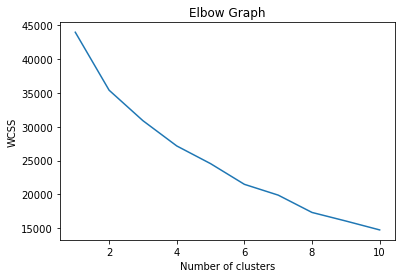

In [82]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [83]:
cluster=KMeans(n_clusters=4,random_state=50).fit(df_norm)
cluster

KMeans(n_clusters=4, random_state=50)

In [84]:
df['cluster']=cluster.labels_


In [85]:
df.groupby('cluster').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
0,44170.677747,96.903402,1.226437,1.019163,1.000391,4749.232303,6.951115,201.699257,0.626907,3700.879937,0.202581
1,116974.855564,157.973954,3.710339,1.002368,1.001579,39389.084451,18.806630,348.764009,1.028414,4881.149961,0.651144
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,194432.643750,794.981250,2.168750,1.037500,1.000000,31897.281250,27.331250,5465.837500,16.018750,4708.400000,0.812500


In [86]:
df['cluster'].value_counts()

0    2557
1    1267
3     160
2      15
Name: cluster, dtype: int64

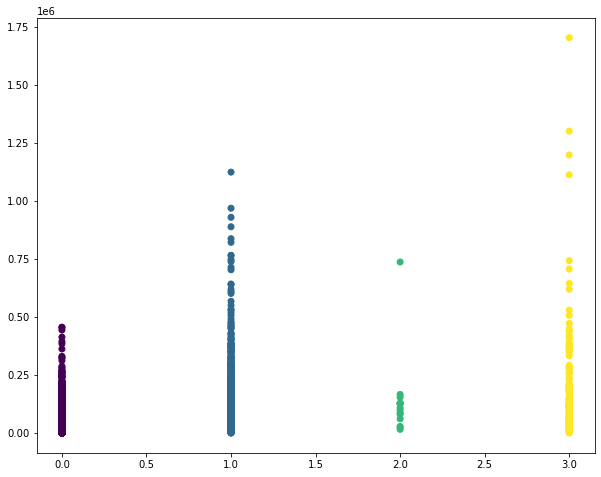

In [87]:
plt.figure(figsize=(10,8))
plt.scatter(df['cluster'],df['Balance'],c=cluster.labels_)

In [88]:
cluster1=KMeans(n_clusters=5,random_state=50).fit(df_norm)
cluster1

KMeans(n_clusters=5, random_state=50)

In [89]:
df['cluster1']=cluster1.labels_
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,cluster1
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [90]:
df.groupby('cluster1').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
cluster1,,,,,,,,,,,,
0,44172.428288,43.994453,1.242076,1.000000,1.000396,4759.433043,6.936212,208.589540,0.640254,3713.938193,0.204041,0.016640
1,195242.238806,530.880597,2.328358,1.000000,1.000000,35253.156716,28.843284,5882.470149,17.111940,4684.485075,0.820896,3.000000
2,118423.046042,57.692246,3.734249,1.000000,1.038772,40515.599354,19.028271,360.218901,1.073506,4894.094507,0.651050,1.023425
3,118476.933333,5361.850000,1.950000,1.000000,1.000000,17258.883333,11.883333,900.466667,2.666667,3981.083333,0.550000,0.850000
4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,0.348837


In [91]:
df['cluster1'].value_counts()

0    2524
2    1238
1     134
3      60
4      43
Name: cluster1, dtype: int64

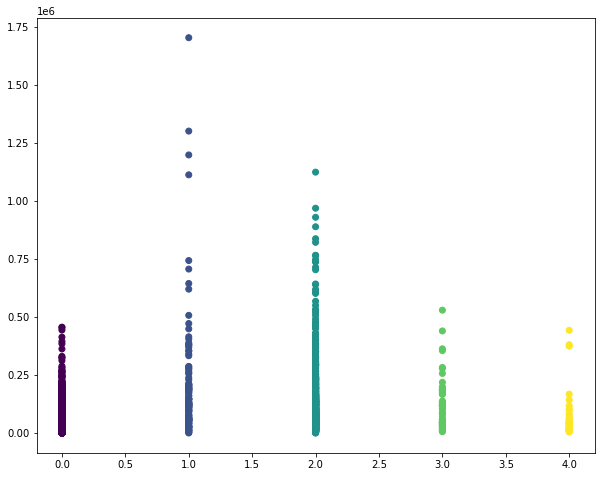

In [92]:
plt.figure(figsize=(10,8))
plt.scatter(df['cluster1'],df['Balance'],c=cluster1.labels_)